In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Recife - 12 days
#Curitiba - 31 days

In [2]:
#city = 'Recife'
city = 'Curitiba'

In [4]:
file_path = '../../data/output/' + city + '/new_feats_data.csv'

data = pd.read_csv(file_path)#, usecols=['route','busCode','alertSubtype','busBunching',
                                       #'GPShour','tripNum', 'shapeId','alertType','alertRoadType','jamBlockType'])
print(data.shape)

(1432633, 111)


In [3]:
file_path = '../../data/output/' + city + '/new_feats_data.csv'

data = pd.read_csv(file_path)#, usecols=['route','busCode','alertSubtype','busBunching',
                                       #'GPShour','tripNum', 'shapeId','alertType','alertRoadType','jamBlockType'])
print(data.shape)

(6211570, 119)


In [3]:
file_path = '../../data/output/' + city + '/new_feats_data.csv'

data = pd.read_csv(file_path, usecols=['route','busCode','alertSubtype','busBunching','DAY(gps_datetime)',
                                       'GPShour','tripNum', 'shapeId','alertType','alertRoadType','jamBlockType'])
print(data.shape)

(6211570, 11)


In [11]:
data.busBunching

0          False
1          False
2          False
3          False
4          False
           ...  
1432628    False
1432629    False
1432630    False
1432631    False
1432632    False
Name: busBunching, Length: 1432633, dtype: bool

In [4]:
data.head()

,route,tripNum,shapeId,busCode,alertSubtype,alertType,alertRoadType,jamBlockType,busBunching,GPShour
0,68,3,Route_160,12021,NORMAL,NORMAL,NaN,-,False,6
1,68,3,Route_160,12021,NORMAL,NORMAL,NaN,NORMAL,False,6
2,68,3,Route_160,12021,NORMAL,NORMAL,NaN,-,False,6
3,68,3,Route_160,12021,NORMAL,NORMAL,NaN,-,False,6
4,68,3,Route_160,12021,NORMAL,NORMAL,NaN,-,False,6


In [5]:
data.shape

(1432633, 10)

In [ ]:
data.head()

In [211]:
data.shape

(1657774, 111)

In [19]:
data.columns

Index(['route', 'tripNum', 'shapeId', 'routeFrequency', 'shapeSequence',
       'shapeLat', 'shapeLon', 'distanceTraveledShape', 'busCode',
       'gpsPointId',
       ...
       'MONTH(alertDateTimeSB)', 'MONTH(jamUpdateDateTimeSB)',
       'WEEKDAY(gps_datetime)', 'WEEKDAY(precipitationTime)',
       'WEEKDAY(alertDateTime)', 'WEEKDAY(jamUpdateDateTime)',
       'WEEKDAY(gps_datetimeSB)', 'WEEKDAY(precipitationTimeSB)',
       'WEEKDAY(alertDateTimeSB)', 'WEEKDAY(jamUpdateDateTimeSB)'],
      dtype='object', length=111)

In [5]:
print('busCode: ' + str(len(data.busCode.unique()))) #Recife

busCode: 789


### Curitiba

In [5]:
data.busBunching[data.busBunching == True].count()

351801

In [6]:
data.busBunching[data.busBunching == True].count() / len(data)

0.056636405932799595

In [9]:
data.head()

,route,tripNum,shapeId,busCode,alertSubtype,alertType,alertRoadType,jamBlockType,busBunching,GPShour,DAY(gps_datetime)
0,232,1,1810,BA001,NORMAL,NORMAL,NaN,NORMAL,True,6,27
1,232,1,1810,BA001,NORMAL,NORMAL,NaN,NORMAL,True,6,27
2,232,1,1810,BA001,NORMAL,NORMAL,NaN,NORMAL,True,6,27
3,232,1,1810,BA001,NORMAL,NORMAL,NaN,NORMAL,True,6,27
4,232,1,1810,BA001,NORMAL,NORMAL,NaN,NORMAL,True,6,27


In [15]:
print('Routes: ' + str(len(data.route.unique())))

Routes: 219


In [16]:
print('shapeId: ' + str(len(data.shapeId.unique())))

shapeId: 443


In [17]:
print('busCode: ' + str(len(data.busCode.unique())))

busCode: 1496


In [18]:
print('alertSubtype: ' + str(len(data.alertSubtype.unique())))

alertSubtype: 28


In [19]:
print('alertType: ' + str(len(data.alertType.unique())))

alertType: 7


In [20]:
print('alertRoadType: ' + str(len(data.alertRoadType.unique())))

alertRoadType: 6


In [21]:
print('jamBlockType: ' + str(len(data.jamBlockType.unique())))

jamBlockType: 5


### Recife

In [8]:
print('Routes: ' + str(len(data.route.unique())))

Routes: 106


In [10]:
print('Buses: ' + str(len(data.busCode.unique())))

Buses: 789


#### Totalizando 2317x2(4634) colunas x 400+ de Recife

### 1. Quantidade média de ônibus nas rotas
#### Em geral, as rotas tem 5 ônibus por dia

In [38]:
buses_per_route_day = data.groupby(['route','DAY(gps_datetime)'])['busCode'].nunique().groupby('route').mean()
buses_per_route_day.mean()

4.488250238462103

### 2. Proporção média dos dados de ônibus que têm dados de clima
#### 100% dos dados de ônibus por parada contêm informações sobre o clima (dados da estação mais próxima)

In [8]:
data.precipitation.isnull().values.any()

False

### 3. Proporção média dos dados de ônibus que têm dados de waze
#### Em geral, 14% dos dados de ônibus por parada contêm informações sobre a via (dados apenas da rua analisada)

In [20]:
# No waze data: -
data.alertSubtype

0                                        -
1                                        -
2                  HAZARD_ON_ROAD_POT_HOLE
3                  HAZARD_ON_ROAD_POT_HOLE
4                           POLICE_VISIBLE
                        ...               
1657769                                  -
1657770                                  -
1657771    HAZARD_ON_SHOULDER_MISSING_SIGN
1657772                                  -
1657773                                  -
Name: alertSubtype, Length: 1657774, dtype: object

In [24]:
waze_data_len = len(data.alertSubtype[data.alertSubtype != '-'])
total = len(data.alertSubtype)

perc = waze_data_len/total
print(perc)

0.13715440102209348


#### Analisando por dia

In [93]:
with_waze_data_per_day = data[data.alertSubtype != '-'].groupby(['DAY(gps_datetime)'])['alertSubtype'].count()
total_data_per_day = data.groupby(['DAY(gps_datetime)'])['alertSubtype'].count()

#when there is no data
with_waze_data_per_day.loc[11] = 0
with_waze_data_per_day = with_waze_data_per_day.sort_index()
perc_waze_per_day =  with_waze_data_per_day / total_data_per_day
perc_waze_per_day.mean()

Text(0.5, 1.0, 'Proportion of waze data per day')

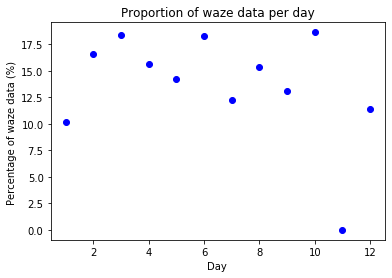

In [151]:
days = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(pd.Series(perc_waze_per_day*100, index=days), 'bo')
plt.ylabel('Percentage of waze data (%) ')
plt.xlabel('Day')
plt.title("Proportion of waze data per day")

### 4. Quantidade média de dados por dia

In [213]:
#Recife
print("Mean of data per day: " + str(total_data_per_day.mean()))
total_data_per_day

Mean of data per day: 138147.83333333334


DAY(gps_datetime)
1      89559
2      94298
3     156547
4     152470
5     191541
6     188843
7     176768
8     119352
9      85932
10    171937
11    187497
12     43030
Name: busBunching, dtype: int64

### 5. Ocorrência média de aglomerados por parada
#### Em média, 11% dos dados são aglomerados

In [161]:
bb_data_per_day = data[data.busBunching == True].groupby(['DAY(gps_datetime)'])['busBunching'].count()
total_data_per_day = data.groupby(['DAY(gps_datetime)'])['busBunching'].count()

perc_bb_per_day =  bb_data_per_day / total_data_per_day
perc_bb_per_day.mean()

0.11196452408748137

Text(0.5, 1.0, 'Proportion of data with bus bunching per day')

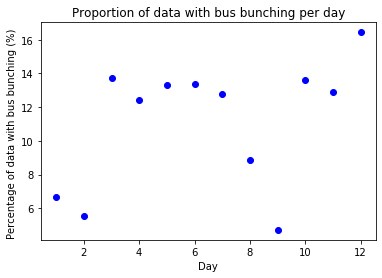

In [162]:
plt.plot(pd.Series(perc_bb_per_day*100, index=days), 'bo')
plt.ylabel('Percentage of data with bus bunching (%)')
plt.xlabel('Day')
plt.title("Proportion of data with bus bunching per day")

### 6. Ocorrência média de aglomerados por ônibus
#### Em geral (mediana), 8% dos dados por ônibus são aglomerados

In [188]:
bb_data_per_bus = data[data.busBunching == True].groupby('busCode')['busBunching'].count()
total_per_bus = data.groupby('busCode')['busBunching'].count()

perc_bb_bus = bb_data_per_bus/total_per_bus
perc_bb_bus.median()

0.08482757847868637

In [181]:
# The visualization is too big
# plt.plot(perc_bb_bus, perc_bb_bus.index.get_values(), 'bo')
perc_bb_bus

busCode
12021    0.021053
12022    0.024560
12023    0.031345
12024    0.068901
12025    0.051651
           ...   
81967    0.019231
81971    0.025974
81977    0.046171
81981    0.250000
81987    0.009537
Name: busBunching, Length: 796, dtype: float64

### 7. Horário de maior ocorrência de aglomerados
#### O horário que mais ocorre BB é às 8h.

In [193]:
bb_data_per_hour = data[data.busBunching == True].groupby('GPShour')['busBunching'].count()
print("Max value index: " + str(bb_data_per_hour.idxmax()))
bb_data_per_hour

Max value index: 8


GPShour
0        88
1        11
2        26
3        27
4      1369
5      8120
6     13424
7     15830
8     16349
9     10491
10     7818
11     7692
12     9979
13     9323
14     8900
15    10728
16    11907
17    12600
18    14322
19    15168
20     9938
21     5754
22     3598
23      804
Name: busBunching, dtype: int64

Text(0.5, 1.0, 'Total of bus bunching per hour')

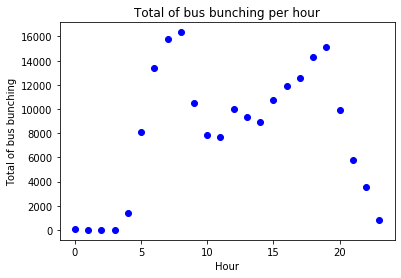

In [203]:
plt.plot(pd.Series(bb_data_per_hour, bb_data_per_hour.index), 'bo')
plt.ylabel('Total of bus bunching')
plt.xlabel('Hour')
plt.title("Total of bus bunching per hour")

In [5]:
#Recife
bb_data_per_hour = data[data.busBunching == True].groupby('GPShour')['busBunching'].count()

#proportion
total_per_hour = data.groupby('GPShour')['busBunching'].count()

perc_bb_route = bb_data_per_hour/total_per_hour

print("Max value index: " + str(perc_bb_route.idxmax()))
perc_bb_route

Max value index: 23


GPShour
0     0.012238
1     0.003568
2     0.007491
3     0.018470
4     0.048881
5     0.103427
6     0.128034
7     0.150334
8     0.160625
9     0.133379
10    0.118139
11    0.114251
12    0.128961
13    0.115955
14    0.110843
15    0.126387
16    0.148792
17    0.150396
18    0.168123
19    0.186310
20    0.150100
21    0.116987
22    0.126180
23    0.259657
Name: busBunching, dtype: float64

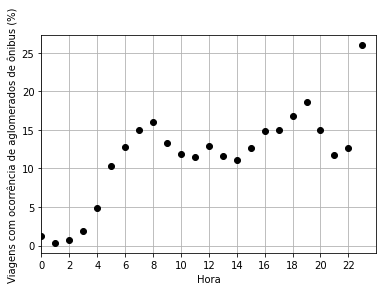

In [6]:
plt.plot(pd.Series(perc_bb_route*100, perc_bb_route.index), 'ko')
plt.ylabel('Viagens com ocorrência de aglomerados de ônibus (%)')
plt.xlabel('Hora')
plt.xlim((0, 24))
plt.grid(True)
plt.xticks(np.arange(0, 24, step=2))
#plt.show()
#plt.title("Total of bus bunching per hour")

plt.savefig("bb_per_hour_cidadea.png")

In [9]:
#Curitiba
bb_data_per_hour = data[data.busBunching == True].groupby('GPShour')['busBunching'].count()

#proportion
total_per_hour = data.groupby('GPShour')['busBunching'].count()

perc_bb_route = bb_data_per_hour/total_per_hour

print("Max value index: " + str(perc_bb_route.idxmax()))
perc_bb_route

Max value index: 8


GPShour
4     0.005523
5     0.027053
6     0.057982
7     0.087914
8     0.098199
9     0.046882
10    0.035909
11    0.034405
12    0.033450
13    0.039244
14    0.042121
15    0.038224
16    0.046636
17    0.070664
18    0.089211
19    0.096935
20    0.050828
21    0.033193
22    0.030595
23    0.071851
Name: busBunching, dtype: float64

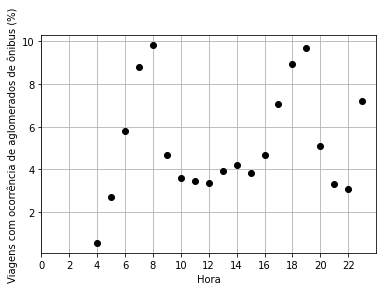

In [37]:
plt.plot(pd.Series(perc_bb_route*100, perc_bb_route.index), 'ko')
plt.ylabel('Viagens com ocorrência de aglomerados de ônibus (%)')
plt.xlabel('Hora')
plt.xlim((0, 24))
plt.grid(True)
plt.xticks(np.arange(0, 24, step=2))
#plt.show()
#plt.title("Total of bus bunching per hour")

plt.savefig("bb_per_hour_curitiba.png")

### 8. Rota com maior ocorrência de aglomerados
#### A rota 16 apresenta a maior ocorrência de BB (16836 - 39%)

In [200]:
bb_data_per_route = data[data.busBunching == True].groupby('route')['busBunching'].count()
print("Max value route: " + str(bb_data_per_route.idxmax()))
print(bb_data_per_route)

#proportion
total_per_route = data.groupby('route')['busBunching'].count()

perc_bb_route = bb_data_per_route/total_per_route
perc_bb_route

Max value route: 16
route
2         75
3       7086
4       6224
6      11397
16     16836
       ...  
547      725
548      166
555       18
556        2
561      254
Name: busBunching, Length: 116, dtype: int64


route
2      0.064267
3      0.165337
4      0.122880
6      0.229588
16     0.388670
         ...   
547    0.063280
548    0.051093
555    0.011905
556    0.083333
561    0.064746
Name: busBunching, Length: 118, dtype: float64

### 9. Proporção de viagens com aglomerados
#### 50% das viagens apresentam pelo menos uma ocorrência de aglomerados

In [210]:
trips_with_bb = data[data.busBunching == True].groupby(['DAY(gps_datetime)','tripNum','busCode'])['busBunching'].unique().count()
total_trips = data.groupby(['DAY(gps_datetime)','tripNum','busCode'])['busBunching'].unique().count()

perc_trips_with_bb = trips_with_bb/total_trips
perc_trips_with_bb

0.5050153531218015

In [21]:
trips_with_bb = data[data.busBunching == True].groupby(['DAY(gps_datetime)','tripNum','busCode'])['busBunching'].count()
trips_with_bb_sum = trips_with_bb.groupby('DAY(gps_datetime)').sum()

total_trips = data.groupby(['DAY(gps_datetime)','tripNum','busCode'])['busBunching'].count()
total_trips_sum = total_trips.groupby('DAY(gps_datetime)').sum()

perc_trips_with_bb = trips_with_bb_sum/total_trips_sum
perc_trips_with_bb

DAY(gps_datetime)
1     0.097547
2     0.075688
3     0.155921
4     0.138164
5     0.145021
6     0.155555
7     0.140960
8     0.108508
9     0.064073
10    0.153584
11    0.143805
12    0.169588
Name: busBunching, dtype: float64

Text(0.5, 1.0, 'Proportion of trips with bus bunching per day')

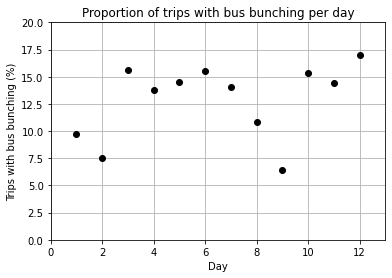

In [38]:
#Recife
days = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(pd.Series(perc_trips_with_bb*100, index=days), 'ko')
plt.ylim((0, 20))
plt.xlim((0, 13))
plt.grid(True)
plt.ylabel('Trips with bus bunching (%)')
plt.xlabel('Day')
plt.title("Proportion of trips with bus bunching per day")

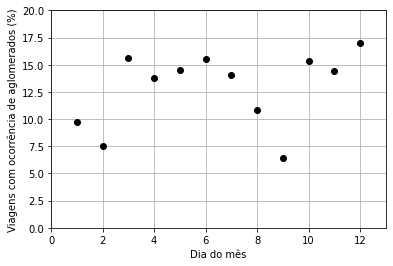

In [9]:
#Recife
days = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(pd.Series(perc_trips_with_bb*100, index=days), 'ko')
plt.ylim((0, 20))
plt.xlim((0, 13))
plt.grid(True)
plt.ylabel('Viagens com ocorrência de aglomerados (%)')
plt.xlabel('Dia do mês')

plt.savefig("bb_per_day_cidadea")

In [4]:
trips_with_bb = data[data.busBunching == True].groupby(['DAY(gps_datetime)','tripNum','busCode'])['busBunching'].count()
trips_with_bb_sum = trips_with_bb.groupby('DAY(gps_datetime)').sum()

total_trips = data.groupby(['DAY(gps_datetime)','tripNum','busCode'])['busBunching'].count()
total_trips_sum = total_trips.groupby('DAY(gps_datetime)').sum()

perc_trips_with_bb = trips_with_bb_sum/total_trips_sum
perc_trips_with_bb

DAY(gps_datetime)
1     0.022172
2     0.071571
3     0.007916
4     0.018741
5     0.014067
6     0.071571
7     0.024625
8     0.010473
9     0.039518
10    0.021590
11    0.036719
12    0.006782
13    0.067147
14    0.029074
15    0.050883
16    0.037607
17    0.096447
18    0.021562
19    0.006515
20    0.043002
21    0.111031
22    0.073313
23    0.074905
24    0.040371
25    0.019381
26    0.007124
27    0.021583
28    0.076580
29    0.062186
30    0.041218
31    0.016124
Name: busBunching, dtype: float64

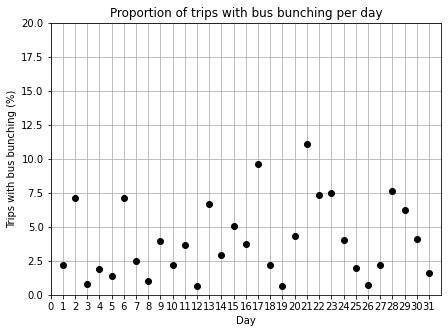

<Figure size 72x72 with 0 Axes>

In [37]:
#Curitiba
days = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
plt.plot(pd.Series(perc_trips_with_bb*100, index=days), 'ko')
plt.ylim((0, 20))
plt.xlim((0, 32))
plt.xticks(np.arange(0, 32, step=1))
#plt.rcParams["figure.figsize"] = (7,5)
plt.grid(True)
plt.ylabel('Trips with bus bunching (%)')
plt.xlabel('Day')
plt.title("Proportion of trips with bus bunching per day")
plt.figure(figsize=(1,1))
plt.show()

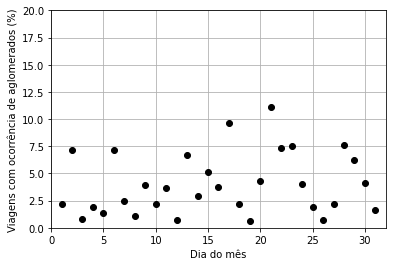

In [8]:
#Curitiba
days = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
plt.plot(pd.Series(perc_trips_with_bb*100, index=days), 'ko')
#plt.xticks(np.arange(0, 32, step=1))
plt.ylim((0, 20))
plt.xlim((0, 32))
plt.grid(True)
plt.ylabel('Viagens com ocorrência de aglomerados (%)')
plt.xlabel('Dia do mês')

plt.savefig("bb_per_day_curitiba")